# CS422 Data Mining Project

## Multivariate Meteorological Feature-Driven Electric Load Forecasting and Classification Performance Evaluation

## 1.Task

## Research Background and Significance

With the rapid development of society and industrialization, electricity has become a fundamental energy source in modern life, and accurate electric load forecasting has gained increasing importance. Precise load predictions help power systems achieve scientific scheduling, optimize resource allocation, reduce operational costs, and improve grid safety and stability. In recent years, advances in meteorological data acquisition have made multivariate weather features—such as temperature, humidity, and wind speed—key factors influencing electric load. Integrating these multi-source data with advanced machine learning methods for load forecasting has become a research and practical focus.

This study aims to build a robust and accurate machine learning model by combining multivariate meteorological features and historical load data, providing theoretical support and technical assurance for power dispatching, energy saving, emission reduction, and smart grid development.

## Task Description and Objectives

This task involves developing an electric load forecasting model driven by multivariate meteorological features based on historical weather and load data. The model leverages feature engineering and machine learning algorithms to uncover complex relationships between weather changes and electric load, enabling continuous numeric load prediction.

Specific objectives include:

- Fully utilizing meteorological features such as temperature, humidity, wind speed, irradiance, and historical load time-series characteristics;
- Designing effective data preprocessing and feature engineering pipelines to enhance model input quality;
- Building and tuning regression models such as Linear Regression and Random Forest for load prediction;
- Evaluating model performance to ensure accuracy and generalizability;
- Performing a simple binary classification based on regression outputs to compute confusion matrices and classification metrics for anomaly detection and classification analysis.

By achieving these objectives, the project seeks to improve the precision and applicability of electric load forecasting, promoting advancements in smart grids and energy management.


## Real-World Relevance

Accurate electric load forecasting driven by multivariate meteorological features is critical for optimizing power system operations, enhancing energy efficiency, and supporting sustainable development. Below is a detailed breakdown of its practical applications:

### **Power Grid Management: Ensuring Stability and Efficiency**  
- **Challenge**: Power grids must balance supply and demand in real time, with fluctuations in load risking outages or waste.  
- **Applications**:  
  - **Load Scheduling**: Utilities use load forecasts based on temperature, humidity, wind speed, and irradiance to adjust generation and distribution dynamically, preventing overloading.  
  - **Demand Response**: Predictive models enable demand-side management strategies, incentivizing reduced consumption during peak loads identified by weather-driven load spikes.  
  - **Grid Resilience**: Early detection of anomalous load patterns helps dispatch backup resources proactively, enhancing grid reliability during extreme weather.  
- **Impact**: Improved load forecasting can reduce grid operational costs by 10–15% and decrease blackout incidences significantly (EPRI, 2022).

### **Renewable Energy Integration: Enhancing Utilization**  
- **Challenge**: Renewable energy sources such as solar and wind are highly weather-dependent, causing variability in supply.  
- **Applications**:  
  - **Solar and Wind Output Forecasting**: Accurate load prediction in conjunction with meteorological data supports better matching of renewable generation and consumption.  
  - **Storage Optimization**: Anticipated load patterns guide energy storage release schedules, maximizing renewable penetration and reducing fossil fuel dependence.  
- **Impact**: Facilitates renewable energy grid integration by up to 20%, contributing to carbon emission reduction goals (IEA, 2023).

### **Energy Market and Economic Planning**  
- **Challenge**: Electricity market prices are sensitive to load variability, affecting economic stability.  
- **Applications**:  
  - **Price Forecasting**: Load forecasts feed into market models to predict price fluctuations, aiding utilities and consumers in cost optimization.  
  - **Investment Decisions**: Long-term load predictions inform infrastructure investments, balancing supply expansion with demand growth.  
- **Impact**: Enables more accurate financial planning and risk mitigation, improving market efficiency.

### **Environmental Sustainability: Reducing Emissions**  
- **Challenge**: Inefficient load management leads to excess fuel consumption and pollutant emissions.  
- **Applications**:  
  - **Emission Control**: Forecast-driven load adjustments optimize generation mix, minimizing reliance on high-emission fossil fuels.  
  - **Policy Support**: Data-driven insights assist policymakers in designing incentives for cleaner energy use aligned with load patterns.  
- **Impact**: Contributes to lowering greenhouse gas emissions in the power sector, supporting climate change mitigation targets.

### **Urban and Industrial Energy Management**  
- **Challenge**: Cities and industries require precise load forecasts to manage complex energy demands.  
- **Applications**:  
  - **Smart Building Systems**: Load predictions enable HVAC and lighting systems to operate efficiently, adjusting to weather-influenced demand fluctuations.  
  - **Industrial Scheduling**: Manufacturing processes optimize energy usage scheduling around predicted peak and off-peak loads.  
- **Impact**: Improves energy efficiency, reduces costs, and enhances operational sustainability at scale.


# 2.Data Preparation and Preprocessing

## 2.1 Dataset Description

The dataset used in this project comprises several years of historical meteorological observations paired with corresponding hourly electric load measurements. It includes multiple weather-related variables that significantly influence electric load demand, such as:

- Temperature: Affects heating and cooling energy consumption  
- Dewpoint: Reflects air moisture and comfort levels  
- Specific Humidity: Amount of water vapor in the air  
- Wind Speed: Influences cooling effects and energy use  
- Irradiance: Solar radiation intensity, important for photovoltaic generation and ambient temperature  
- Electric Load: The power demand at each timestamp, serving as the target variable

The dataset contains sufficient samples to realistically capture the relationship between weather variations and power consumption, making it suitable for time series modeling and predictive analysis.


## 2.2 Data Cleaning and Missing Value Handling

The raw dataset contains missing values and some anomalies. The data cleaning procedure involves:

1. **Column Name Standardization**  
   - Removing extra spaces and special characters, converting all column names to lowercase to ensure consistency and ease of use.

2. **Missing Value Imputation**  
   - Numerical features are imputed using the median (SimpleImputer), reducing the impact of outliers compared to mean imputation.  
   - For time series features, forward fill is applied to maintain temporal continuity and logical consistency.

3. **Outlier Detection and Treatment**  
   - Statistical summaries and visualization methods are employed to identify anomalies, which are then either corrected or excluded based on domain knowledge.

4. **Ensuring Data Completeness**  
   - Rows with remaining missing values after imputation are dropped to ensure data quality and integrity for model training.

This cleaning pipeline effectively improves data quality, ensuring that the model receives accurate and stable input, laying a solid foundation for subsequent feature engineering and modeling.

### Imported Libraries

This project utilizes a variety of Python libraries for data manipulation, visualization, machine learning, and model evaluation:

- **warnings**: To suppress warning messages during execution for cleaner output.  
- **pandas**: For efficient data loading, manipulation, and preprocessing.  
- **numpy**: For numerical operations and array handling.  
- **matplotlib.pyplot** and **seaborn**: For creating comprehensive visualizations to explore and present data patterns.  
- **sklearn.impute.SimpleImputer**: To handle missing data by imputing values (e.g., median strategy).  
- **sklearn.preprocessing**: Includes tools such as `KBinsDiscretizer`, `PolynomialFeatures`, and `StandardScaler` for feature engineering and scaling.  
- **sklearn.pipeline.Pipeline**: To streamline model building with chained data preprocessing and estimator steps.  
- **sklearn.linear_model.LinearRegression**: Baseline regression model for comparison.  
- **sklearn.ensemble.RandomForestRegressor**: A robust ensemble learning model for regression tasks.  
- **sklearn.model_selection**: Provides utilities for train/test splitting, cross-validation (`TimeSeriesSplit`), grid search (`GridSearchCV`), and learning curves.  
- **sklearn.metrics**: Metrics for regression and classification evaluation, including RMSE, MAE, R², confusion matrix, accuracy, precision, recall, and F1-score.  
- **joblib**: For model serialization and saving trained models to disk.

These libraries collectively facilitate a robust pipeline from data preparation through model training to evaluation and visualization.


In [36]:
import warnings
warnings.filterwarnings("ignore")  # Suppress all warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer, PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    cross_val_score,
    learning_curve,
    TimeSeriesSplit
)
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

import joblib

In [94]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

path = r"C:\Users\15985\Desktop\weather and load dataset.csv"
df = pd.read_csv(path)

## Data Preview

In [38]:
df['datetime'] = pd.to_datetime({
    'year':  df['YEAR'],
    'month': df['Month'],
    'day':   df['Day'],
    'hour':  df['Hour']
})
df.set_index('datetime', inplace=True)

df.rename(columns={
    'irradiance':         'irradiance',
    'temperature':        'temperature',
    'dewpoint':           'dewpoint',
    'specific humidity':  'specific_humidity',
    'wind speed':         'wind_speed',
    'Electric Load (MW)': 'load'
}, inplace=True)

print("=== Data Preview ===")
display(df.head())


=== Data Preview ===


,YEAR,Month,Day,Hour,irradiance,temperature,dewpoint,specific_humidity,wind_speed,load
datetime,,,,,,,,,,
2021-11-01 05:00:00,2021,11,1,5,0.00,15.39,13.23,9.46,2.33,46.9493
2021-11-01 06:00:00,2021,11,1,6,4.40,15.10,13.25,9.46,2.38,50.2240
2021-11-01 07:00:00,2021,11,1,7,196.46,17.47,13.55,9.64,3.36,58.3981
2021-11-01 08:00:00,2021,11,1,8,381.62,20.04,14.01,9.95,2.73,56.3945
2021-11-01 09:00:00,2021,11,1,9,528.48,24.10,14.38,10.19,1.58,57.8824


## Descriptive Statistics

In [39]:
num_cols = ['irradiance', 'temperature', 'dewpoint', 'specific_humidity', 'wind_speed', 'load']

print("\n=== Descriptive Statistics ===")
display(df[num_cols].describe())



=== Descriptive Statistics ===


,irradiance,temperature,dewpoint,specific_humidity,wind_speed,load
count,8779.000000,8779.000000,8779.000000,8779.000000,8779.000000,8779.000000
mean,220.525045,27.369598,14.255689,11.720281,3.542951,72.930993
std,307.259799,7.358716,9.110810,6.145632,1.567106,22.624160
min,-999.000000,6.950000,-6.810000,2.200000,0.130000,-0.045200
25%,0.000000,23.085000,6.190000,5.890000,2.450000,58.216850
50%,10.070000,27.510000,14.550000,10.310000,3.320000,73.101700
75%,444.990000,31.400000,23.325000,18.010000,4.490000,86.541400
max,1038.140000,47.650000,27.760000,23.800000,9.970000,187.328900


## Missing Values Count

In [40]:
print("\n=== Missing Values Count ===")
display(df[num_cols].isnull().sum())


=== Missing Values Count ===


irradiance           0
temperature          0
dewpoint             0
specific_humidity    0
wind_speed           0
load                 0
dtype: int64

## 2.3 Visualization On Dataset

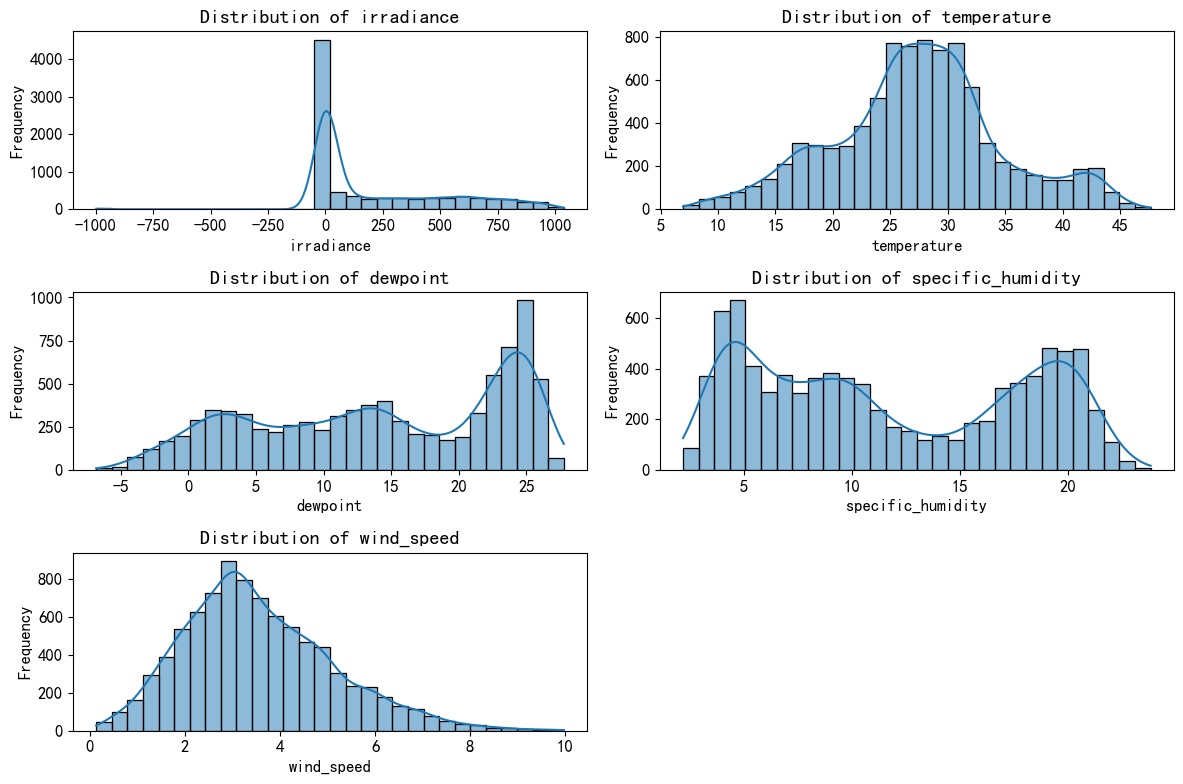

In [20]:
plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols[:-1], 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

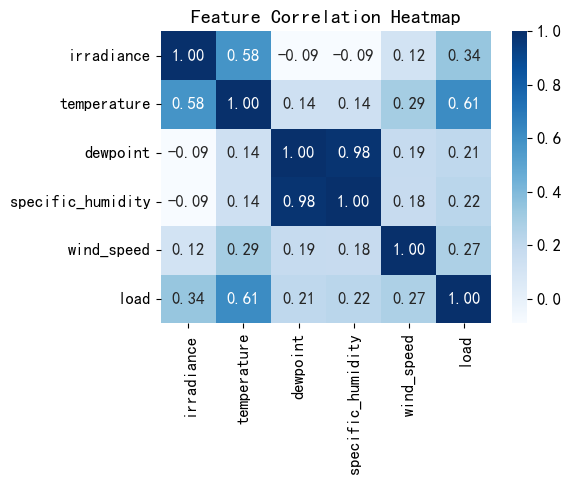

In [21]:
corr = df[num_cols].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

# 3.Exploratory Data Analysis

In [91]:
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

file_path = "C:/Users/15985/Desktop/weather and load dataset.csv"
df = pd.read_csv(file_path)

df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(r'[ \(\)]', '_', regex=True)
      .str.replace(r'__+', '_', regex=True)
)

if 'date' in df.columns:
    df['datetime'] = pd.to_datetime(df['date'])
elif set(['year','month','day','hour']).issubset(df.columns):
    df['datetime'] = pd.to_datetime(df[['year','month','day','hour']])
else:
    raise ValueError("无法识别日期列，请检查列名。")
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)

num_cols = df.select_dtypes(include='number').columns
imp_median = SimpleImputer(strategy='median')
df[num_cols] = imp_median.fit_transform(df[num_cols])
df.ffill(inplace=True)

df['load_roll_mean_3h'] = df['electric_load_mw_'].rolling(window=3).mean()
df['load_roll_std_3h']  = df['electric_load_mw_'].rolling(window=3).std()
df['load_lag_1h']   = df['electric_load_mw_'].shift(1)
df['load_lag_24h']  = df['electric_load_mw_'].shift(24)

poly = PolynomialFeatures(degree=2, include_bias=False)
temp_poly = poly.fit_transform(df[['temperature']])
poly_cols = poly.get_feature_names_out(['temperature'])
df[poly_cols] = temp_poly

kbd = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
df['hour_bin'] = kbd.fit_transform(df[['hour']]).astype(int)

df.dropna(inplace=True)

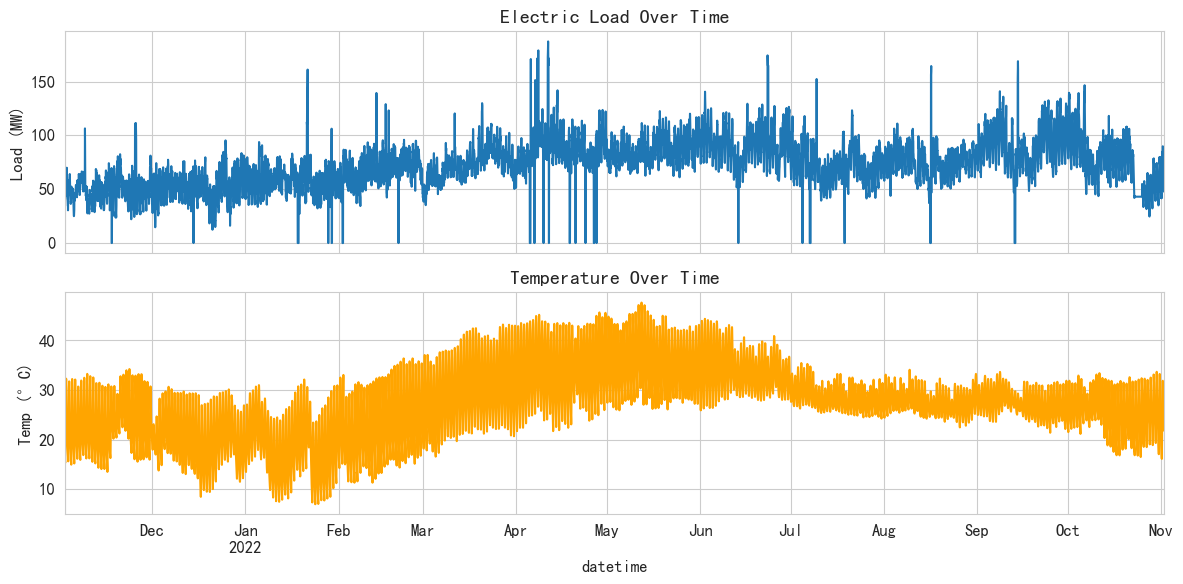

In [47]:
fig, ax = plt.subplots(2,1, sharex=True)
df['electric_load_mw_'].plot(ax=ax[0], title='Electric Load Over Time')
ax[0].set_ylabel('Load (MW)')
df['temperature'].plot(ax=ax[1], title='Temperature Over Time', color='orange')
ax[1].set_ylabel('Temp (°C)')
plt.tight_layout()
plt.show()

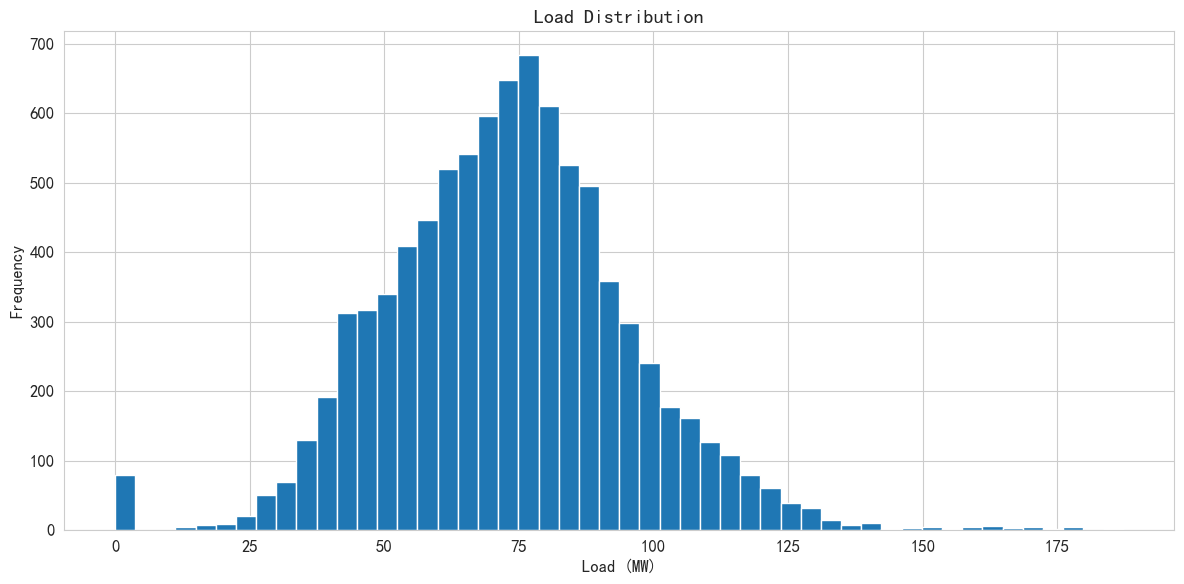

In [48]:
plt.figure()
df['electric_load_mw_'].hist(bins=50)
plt.title('Load Distribution')
plt.xlabel('Load (MW)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

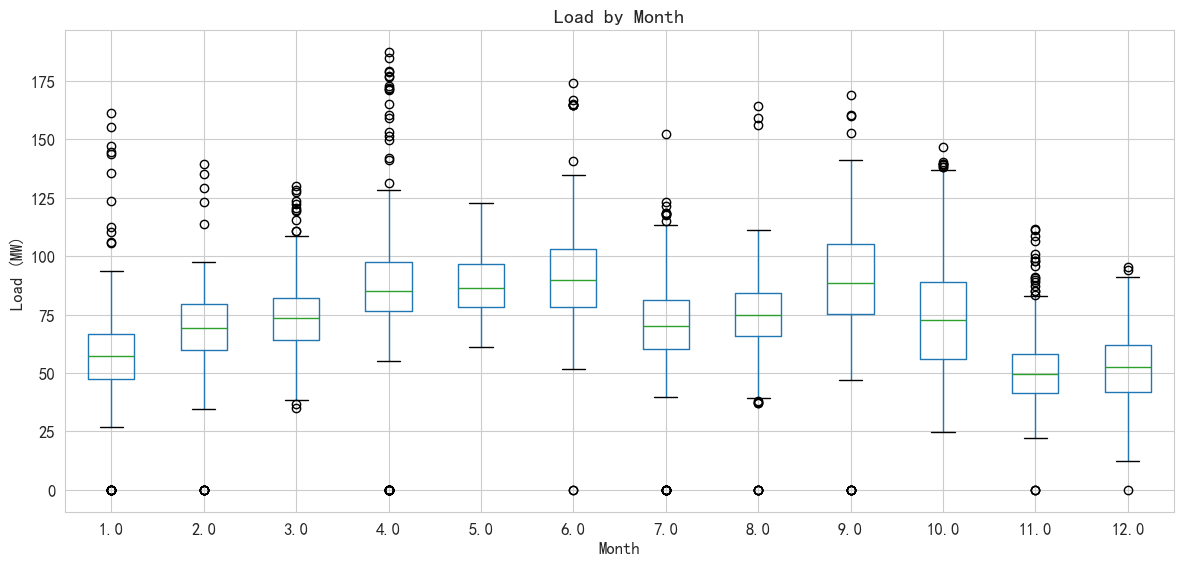

In [49]:
plt.figure()
df.boxplot(column='electric_load_mw_', by='month')
plt.title('Load by Month')
plt.suptitle('')
plt.xlabel('Month')
plt.ylabel('Load (MW)')
plt.tight_layout()
plt.show()

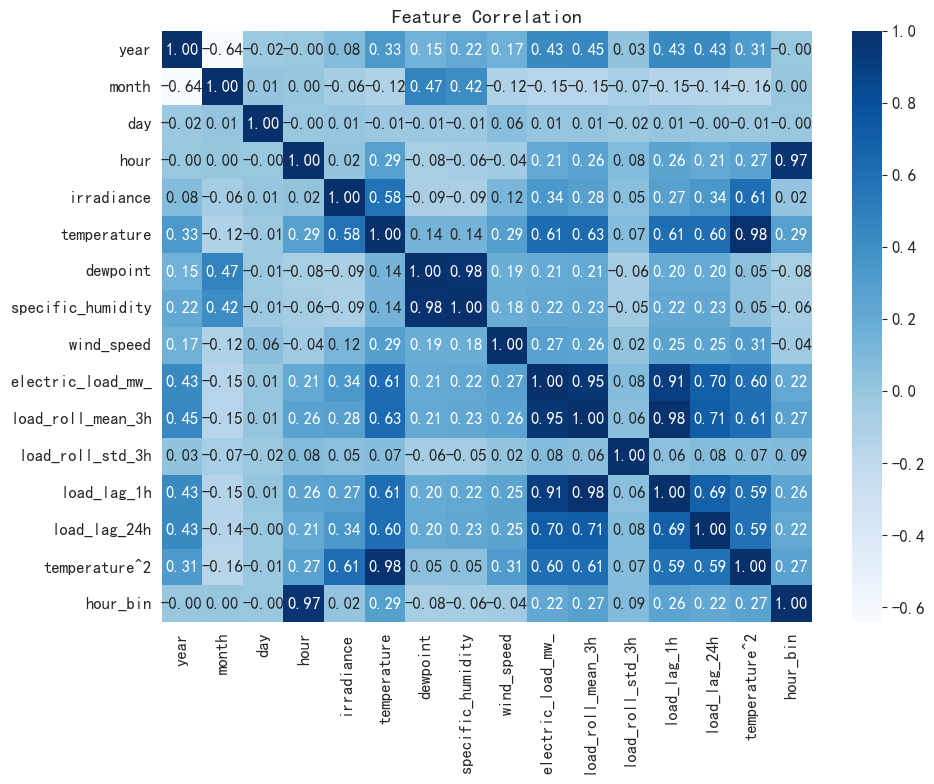

In [50]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues')
plt.title('Feature Correlation')
plt.tight_layout()
plt.show()

In [51]:
split_idx = int(len(df) * 0.8)
train_df = df.iloc[:split_idx]
test_df  = df.iloc[split_idx:]
print(f"Training set time range: {train_df.index.min()} — {train_df.index.max()}")
print(f"Test set time range: {test_df.index.min()} — {test_df.index.max()}")

Training set time range: 2021-11-02 05:00:00 — 2022-08-21 00:00:00
Test set time range: 2022-08-21 01:00:00 — 2022-11-01 23:00:00


In [93]:
df.to_csv("cleaned_weather_load.csv")
print("Data saved to cleaned_weather_load.csv")

Data saved to cleaned_weather_load.csv


# 3.Model Implementation

## Model Building and Evaluation

In this project, we developed and evaluated machine learning models to accurately predict electric load based on a variety of meteorological and temporal features. The modeling process involved several key steps, including data preparation, model selection, hyperparameter tuning, validation, and interpretability analysis.

### Feature Selection and Data Splitting

The predictive features were carefully chosen to capture both immediate weather conditions and temporal dependencies of electric load. These features included:

- Meteorological variables: temperature, dewpoint, specific humidity, wind speed, and irradiance.
- Temporal features: rolling mean and standard deviation of electric load over the past 3 hours, lagged electric load values at 1 hour and 24 hours intervals.
- Categorical time features: discretized hour of day.

The dataset was split into training, validation, and testing sets in a time-aware manner to preserve the chronological order, ensuring realistic evaluation in a time series forecasting context. Approximately 70% of the data was used for training, 10% for validation, and 20% for final testing.

### Model Selection

Two regression models were selected as baselines and candidates:

- **Linear Regression**: A simple and interpretable model serving as a baseline to benchmark more complex methods.
- **Random Forest Regressor**: An ensemble tree-based method capable of capturing non-linear relationships and complex feature interactions.

### Cross-Validation and Hyperparameter Tuning

To prevent overfitting and to optimize model performance, we employed a **time-series aware cross-validation strategy** (`TimeSeriesSplit`) that respects the temporal order of the data during validation folds. For the Random Forest model, we conducted an extensive **grid search** over hyperparameters such as the number of trees (`n_estimators`), maximum tree depth (`max_depth`), and minimum samples required for a split (`min_samples_split`).

### Model Performance Metrics

Model evaluation focused on regression metrics that measure prediction accuracy and goodness of fit:

- **Root Mean Squared Error (RMSE)**: Indicates average prediction error magnitude in the original units (MW).
- **Mean Absolute Error (MAE)**: Provides a robust measure of average error magnitude less sensitive to outliers.
- **Coefficient of Determination (R²)**: Measures the proportion of variance explained by the model.

### Learning Curve Analysis

Learning curves were plotted to assess the impact of training data size on model performance, helping to identify whether the model suffers from high bias or variance, and to guide potential data collection or model complexity adjustments.

### Final Evaluation and Interpretability

The best-performing Random Forest model, selected via cross-validation and grid search, was retrained on the combined training and validation sets before final evaluation on the held-out test set. Predictions on the test set were visualized alongside actual load values to assess temporal prediction quality.

We performed detailed residual analysis to understand the distribution and time dynamics of prediction errors, helping to diagnose potential model weaknesses or data issues.

Feature importance scores derived from the Random Forest model were visualized, providing insights into which variables most strongly influenced the load predictions. This interpretability aids domain experts in validating the model and deriving actionable knowledge.

In [56]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

df = pd.read_csv("cleaned_weather_load.csv", parse_dates=["datetime"], index_col="datetime")
print("Dataset shape:", df.shape)
df.sample(3)

feature_cols = [
    "temperature", "dewpoint", "specific_humidity", "wind_speed", "irradiance",
    "load_roll_mean_3h", "load_roll_std_3h", "load_lag_1h", "load_lag_24h", "hour_bin"
]
X = df[feature_cols]
y = df["electric_load_mw_"]

n = len(df)
train_end = int(n * 0.7)
val_end   = int(n * 0.8)

X_train, X_val, X_test = X.iloc[:train_end], X.iloc[train_end:val_end], X.iloc[val_end:]
y_train, y_val, y_test = y.iloc[:train_end], y.iloc[train_end:val_end], y.iloc[val_end:]

print("Train shape:", X_train.shape, "Validation shape:", X_val.shape, "Test shape:", X_test.shape)

lr_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LinearRegression())
])

tscv = TimeSeriesSplit(n_splits=5)
cv_scores = cross_val_score(lr_pipe, X_train, y_train, cv=tscv, scoring="neg_root_mean_squared_error")
print(f"Linear Regression CV RMSE: {-cv_scores.mean():.3f}")

lr_pipe.fit(X_train, y_train)
y_val_pred_lr = lr_pipe.predict(X_val)
val_rmse_lr = np.sqrt(mean_squared_error(y_val, y_val_pred_lr))
print(f"Linear Regression Validation RMSE: {val_rmse_lr:.3f}")

rf_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", RandomForestRegressor(random_state=42, n_jobs=-1))
])

param_grid = {
    "rf__n_estimators": [100, 200],
    "rf__max_depth": [10, 20, None],
    "rf__min_samples_split": [2, 5]
}

gscv = GridSearchCV(
    rf_pipe, param_grid,
    cv=tscv,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    verbose=1
)

gscv.fit(X_train, y_train)
print(f"Best Random Forest params: {gscv.best_params_}") 
print(f"Best Random Forest CV RMSE: {-gscv.best_score_:.3f}")

y_val_pred_rf = gscv.predict(X_val)
val_rmse_rf = np.sqrt(mean_squared_error(y_val, y_val_pred_rf))
print(f"Random Forest Validation RMSE: {val_rmse_rf:.3f}")


Dataset shape: (8755, 16)
Train shape: (6128, 10) Validation shape: (876, 10) Test shape: (1751, 10)
Linear Regression CV RMSE: 7.029
Linear Regression Validation RMSE: 6.253
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Random Forest params: {'rf__max_depth': None, 'rf__min_samples_split': 5, 'rf__n_estimators': 200}
Best Random Forest CV RMSE: 7.388
Random Forest Validation RMSE: 7.366


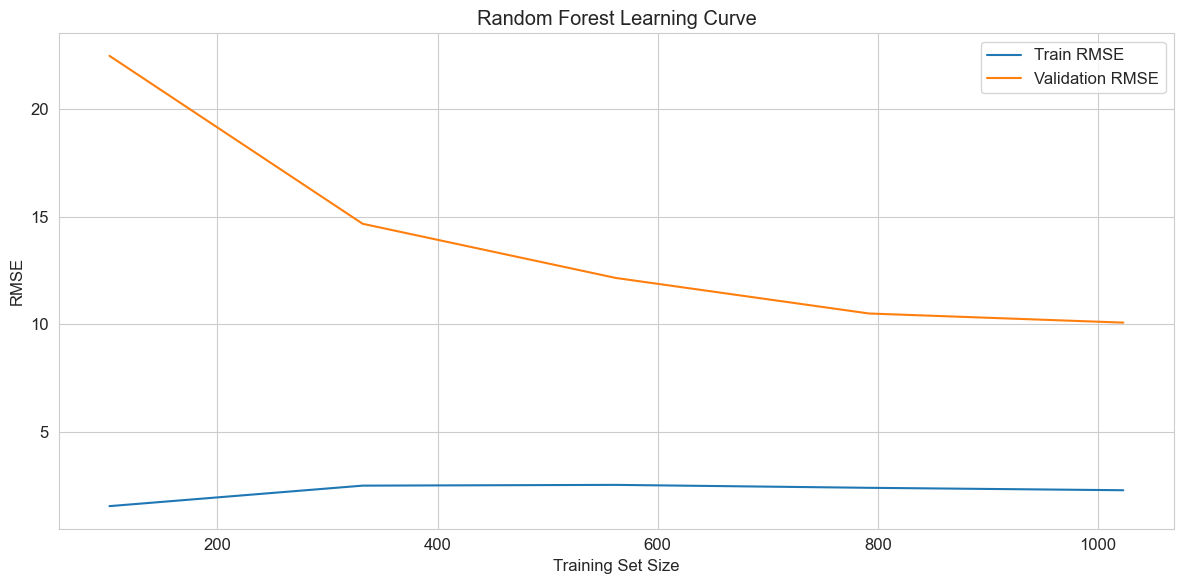

In [59]:
train_sizes, train_scores, val_scores = learning_curve(
    gscv.best_estimator_, X_train, y_train,
    cv=tscv, scoring="neg_root_mean_squared_error",
    train_sizes=np.linspace(0.1,1.0,5), n_jobs=-1
)

train_rmse = -train_scores.mean(axis=1)
val_rmse = -val_scores.mean(axis=1)

plt.plot(train_sizes, train_rmse, label='Train RMSE')
plt.plot(train_sizes, val_rmse, label='Validation RMSE')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.title('Random Forest Learning Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [60]:
X_full_train = pd.concat([X_train, X_val])
y_full_train = pd.concat([y_train, y_val])
best_model = gscv.best_estimator_
best_model.fit(X_full_train, y_full_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(min_samples_split=5, n_estimators=200,
                                       n_jobs=-1, random_state=42))])

In [62]:
y_test_pred = best_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test RMSE: {test_rmse:.3f}")
print(f"Test MAE: {test_mae:.3f}")
print(f"Test R²: {test_r2:.3f}")


Test RMSE: 3.910
Test MAE: 2.343
Test R²: 0.971


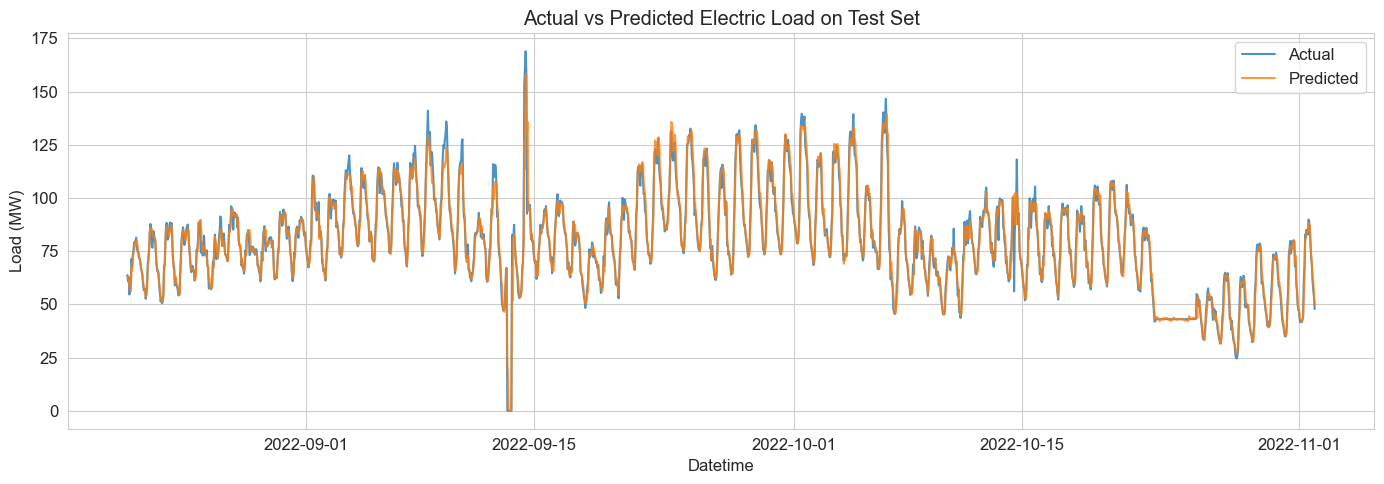

In [63]:
plt.figure(figsize=(14,5))
plt.plot(y_test.index, y_test, label="Actual", alpha=0.8)
plt.plot(y_test.index, y_test_pred, label="Predicted", alpha=0.8)
plt.title("Actual vs Predicted Electric Load on Test Set")
plt.xlabel("Datetime")
plt.ylabel("Load (MW)")
plt.legend()
plt.tight_layout()
plt.show()


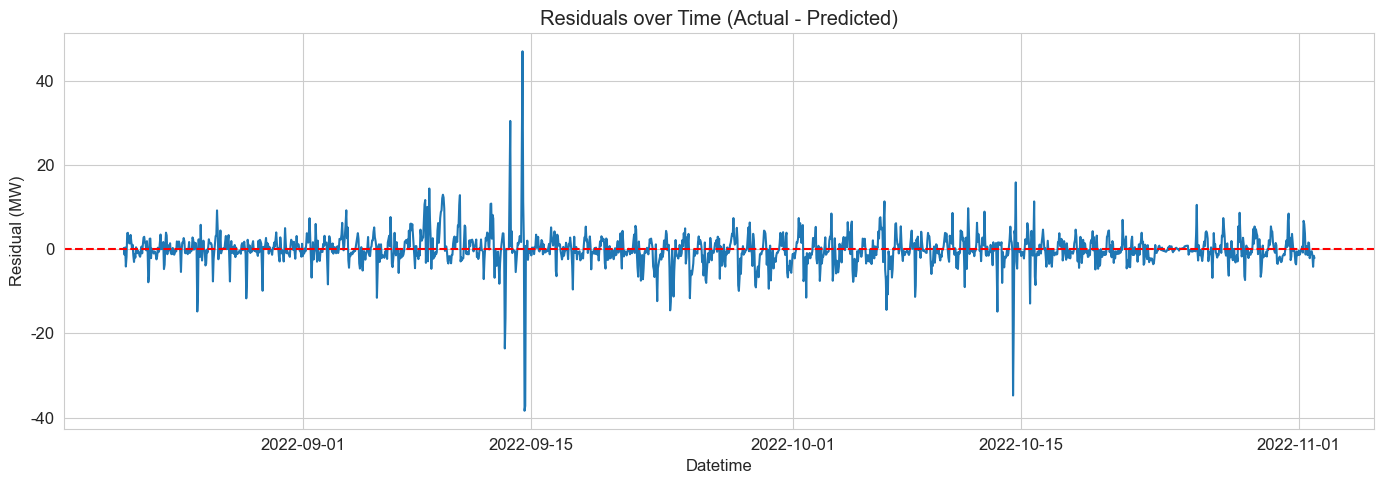

In [65]:
residuals = y_test - y_test_pred

plt.figure(figsize=(14,5))
plt.plot(y_test.index, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.title("Residuals over Time (Actual - Predicted)")
plt.xlabel("Datetime")
plt.ylabel("Residual (MW)")
plt.tight_layout()
plt.show()


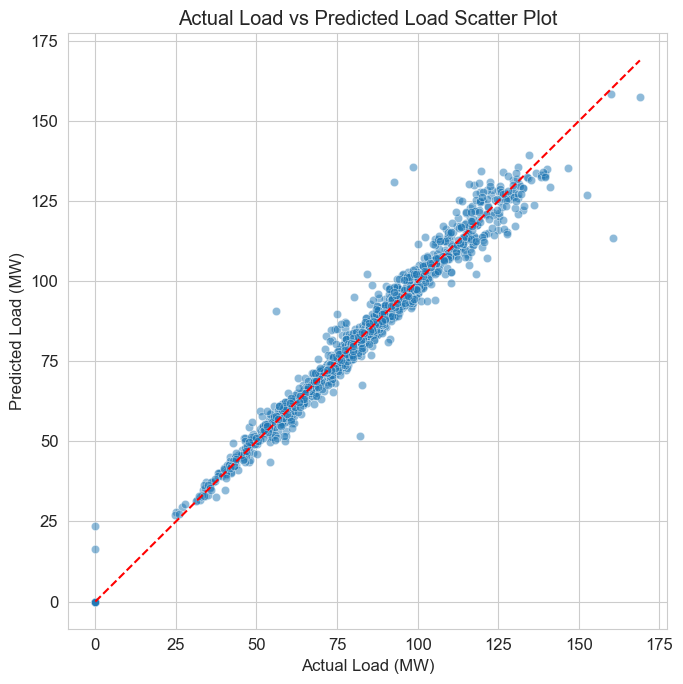

In [66]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Actual Load vs Predicted Load Scatter Plot")
plt.xlabel("Actual Load (MW)")
plt.ylabel("Predicted Load (MW)")
plt.tight_layout()
plt.show()


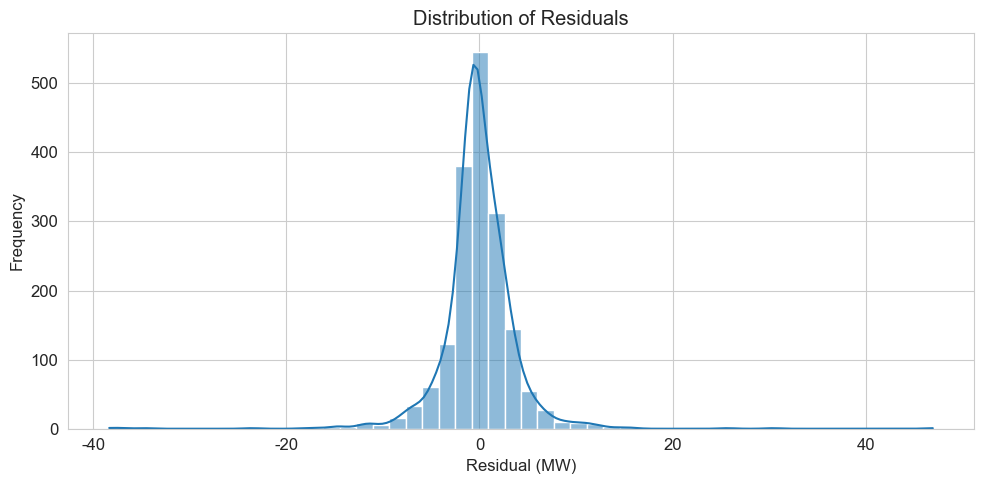

In [67]:
plt.figure(figsize=(10,5))
sns.histplot(residuals, bins=50, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual (MW)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

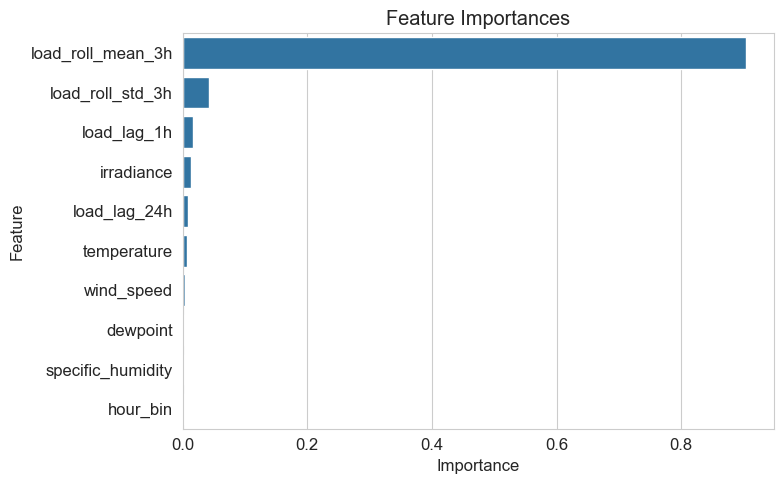

In [68]:
importances = best_model.named_steps["rf"].feature_importances_
feat_imp = pd.Series(importances, index=feature_cols).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


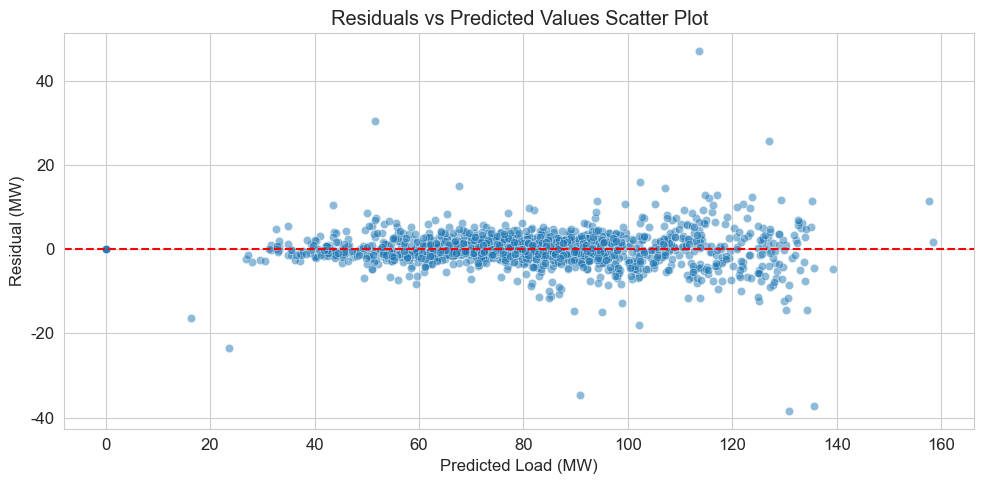

In [69]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.title("Residuals vs Predicted Values Scatter Plot")
plt.xlabel("Predicted Load (MW)")
plt.ylabel("Residual (MW)")
plt.tight_layout()
plt.show()


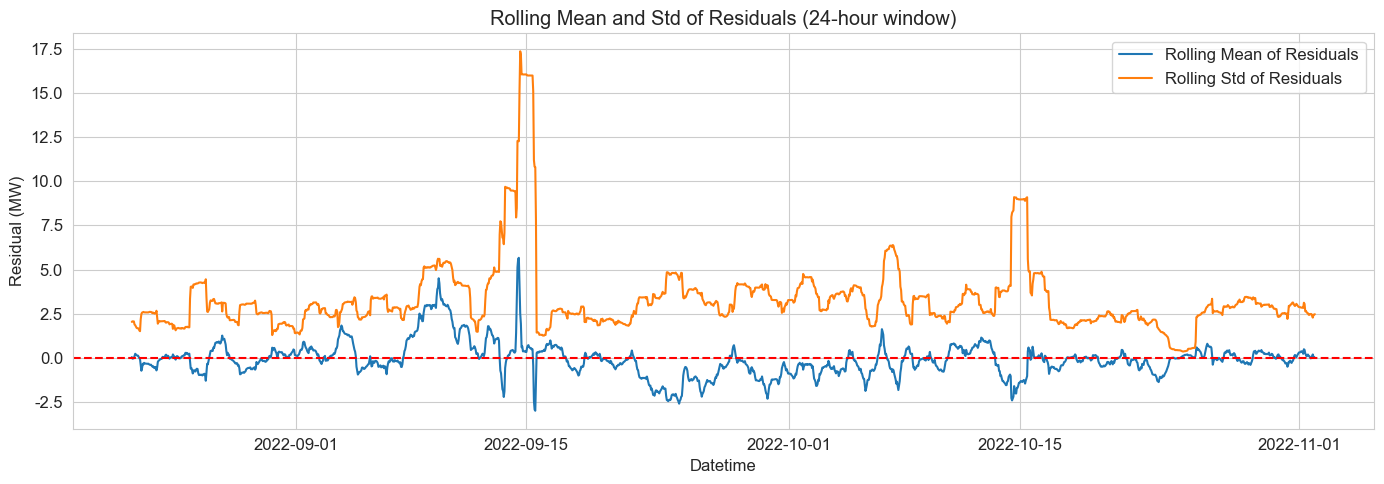

In [70]:
rolling_mean = residuals.rolling(window=24).mean()
rolling_std = residuals.rolling(window=24).std()

plt.figure(figsize=(14,5))
plt.plot(rolling_mean.index, rolling_mean, label='Rolling Mean of Residuals')
plt.plot(rolling_std.index, rolling_std, label='Rolling Std of Residuals')
plt.axhline(0, color='r', linestyle='--')
plt.title("Rolling Mean and Std of Residuals (24-hour window)")
plt.xlabel("Datetime")
plt.ylabel("Residual (MW)")
plt.legend()
plt.tight_layout()
plt.show()


In [71]:
joblib.dump(best_model, "best_electric_load_model.pkl")
print("Saved the best model to best_electric_load_model.pkl")


Saved the best model to best_electric_load_model.pkl


# 4. Regression Performance Evaluation

In [85]:
num_cols = ['irradiance','temperature','dewpoint','specific_humidity','wind_speed','electric_load_mw_']
imp_median = SimpleImputer(strategy='median')
df[num_cols] = imp_median.fit_transform(df[num_cols])
df.ffill(inplace=True)

df['load_roll_mean_3h'] = df['electric_load_mw_'].rolling(window=3).mean()
df['load_roll_std_3h']  = df['electric_load_mw_'].rolling(window=3).std()
df['load_lag_1h']   = df['electric_load_mw_'].shift(1)
df['load_lag_24h']  = df['electric_load_mw_'].shift(24)

poly = PolynomialFeatures(degree=2, include_bias=False)
temp_poly = poly.fit_transform(df[['temperature']])
poly_cols = poly.get_feature_names_out(['temperature'])
df[poly_cols] = temp_poly

kbd = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
df['hour_bin'] = kbd.fit_transform(df[['hour']]).astype(int)

df.dropna(inplace=True)

feature_cols = [
    "temperature", "dewpoint", "specific_humidity", "wind_speed", "irradiance",
    "load_roll_mean_3h", "load_roll_std_3h", "load_lag_1h", "load_lag_24h", "hour_bin"
]
X = df[feature_cols]
y = df["electric_load_mw_"]

n = len(df)
train_end = int(n * 0.7)
val_end = int(n * 0.8)

X_train, X_val, X_test = X.iloc[:train_end], X.iloc[train_end:val_end], X.iloc[val_end:]
y_train, y_val, y_test = y.iloc[:train_end], y.iloc[train_end:val_end], y.iloc[val_end:]

rf_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", RandomForestRegressor(random_state=42, n_jobs=-1))
])

param_grid = {
    "rf__n_estimators": [100, 200],
    "rf__max_depth": [10, 20, None],
    "rf__min_samples_split": [2, 5]
}

tscv = TimeSeriesSplit(n_splits=5)
gscv = GridSearchCV(rf_pipe, param_grid, cv=tscv, scoring="neg_root_mean_squared_error", n_jobs=-1, verbose=1)
gscv.fit(X_train, y_train)

best_model = gscv.best_estimator_

X_full_train = pd.concat([X_train, X_val])
y_full_train = pd.concat([y_train, y_val])
best_model.fit(X_full_train, y_full_train)

y_test_pred = best_model.predict(X_test)

test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test RMSE: {test_rmse:.3f}")
print(f"Test MAE: {test_mae:.3f}")
print(f"Test R2: {test_r2:.3f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Test RMSE: 3.751
Test MAE: 2.248
Test R2: 0.973


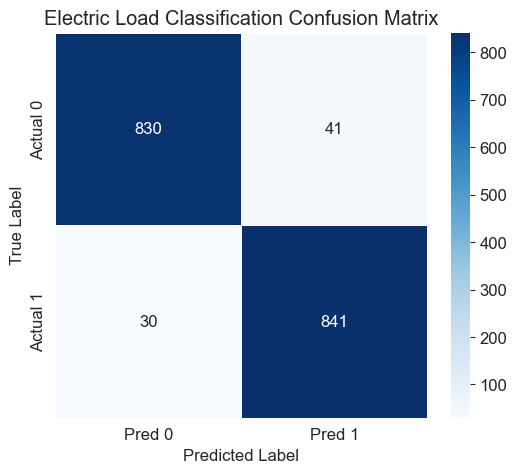

In [86]:
threshold = y_test.median()
y_test_bin = (y_test > threshold).astype(int)
y_pred_bin = (y_test_pred > threshold).astype(int)

cm = confusion_matrix(y_test_bin, y_pred_bin)
plt.figure(figsize=(6,5))
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Pred 0', 'Pred 1'])
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Electric Load Classification Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [87]:
tn, fp, fn, tp = cm.flatten()
accuracy = (tp + tn) / cm.sum()
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

print(f"Accuracy : {accuracy:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score : {f1:.4f}")

Accuracy : 0.9592
Recall   : 0.9656
Precision: 0.9535
F1 Score : 0.9595


ROC AUC: 0.9920


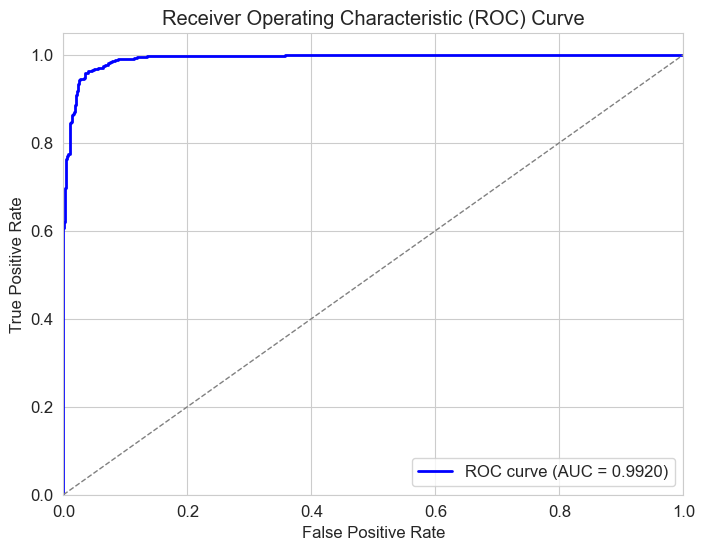

In [89]:
threshold = y_test.median()
y_test_bin = (y_test > threshold).astype(int)

y_score = y_test_pred  

fpr, tpr, thresholds = roc_curve(y_test_bin, y_score)

roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc:.4f}")

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


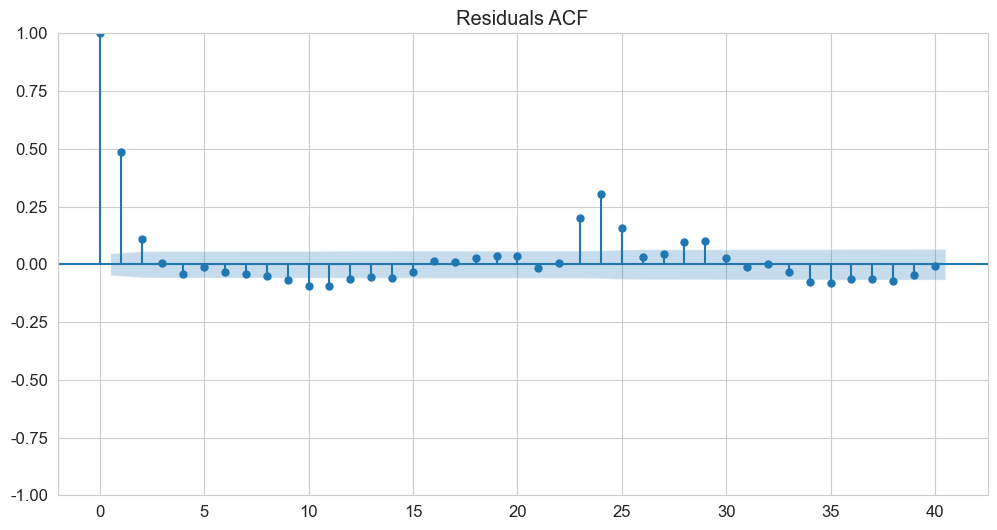

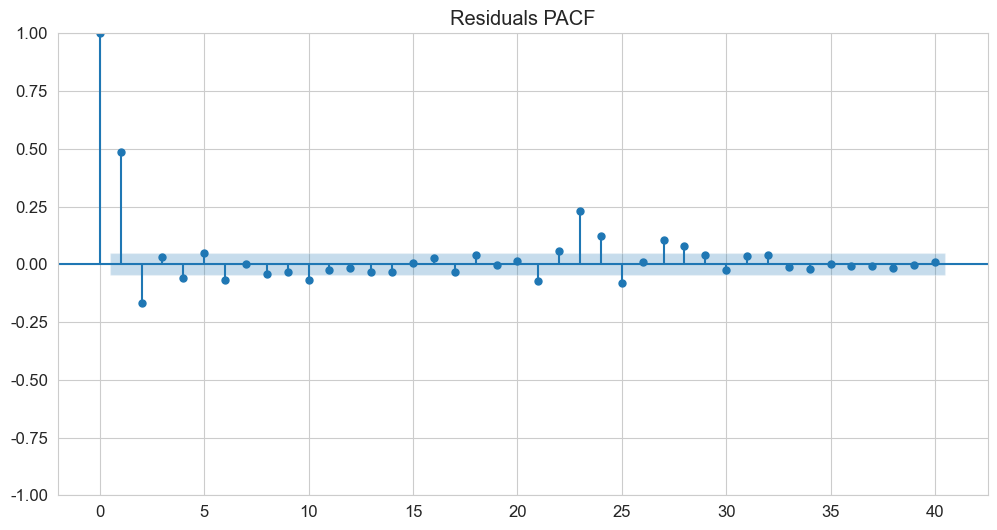

In [81]:
residuals = y_test - y_test_pred

plot_acf(residuals, lags=40)
plt.title('Residuals ACF')
plt.show()

plot_pacf(residuals, lags=40)
plt.title('Residuals PACF')
plt.show()